<a href="https://colab.research.google.com/github/zdwhite/Thinkful-Unit-2/blob/master/Linear_Regression_Model_Assumptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [0]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


In [0]:

data['Sales'].values.reshape(-1, 1)
data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Assumption one: linear relationship



*  ** If the relationship is non-linear, the regression model will try to find any hint of a linear relationship**
*  **can be fixed by applying a non-linear transformation function to a feature**



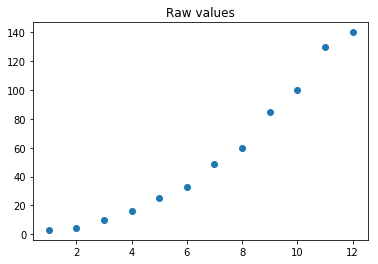

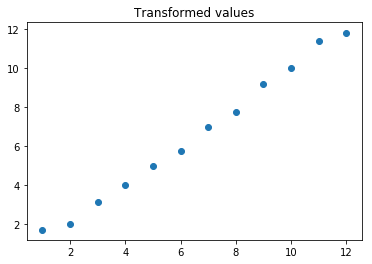

In [0]:
# Sample data.
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

### Assumption two: multivariate normality

*    **The error from the model should be normally distributed**
*    **Outliers or skewness in error can often be traced back to outliers or skewness in data**

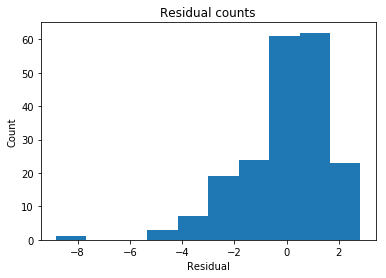

In [0]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Assumption three: homoscedasticity



*   **Inconsistent distribution of error**
    *  ex : more variance in the error for large outcome values than for small ones
*   **Fix by**
    *   Transform the dependent variable and adding features that target the poorly-estimated areas



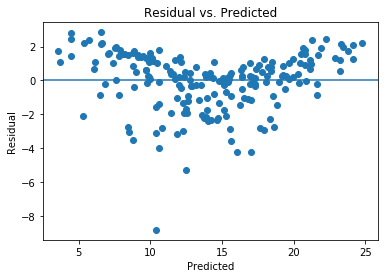

In [0]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

### Assumption four: low multicollinearity



*  ** Multicollinearity can cause us to underestimate the relationship between features and outcomes.**
*  **Multicollinearity can be fixed by PCA or by discarding some of the correlated features.**



In [0]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


## Drill: fixing assumptions



*   Assumption two : multivariate non-normality
*   Assumption three : heteroscedasticity



In [0]:

#do a bunch of shit so I can scatter plot this bitch
df = data.set_index(['Sales'])
df = df.drop('Unnamed: 0',axis=1)
df=df.stack().reset_index()
df.columns=['Sales','Variable','Value']

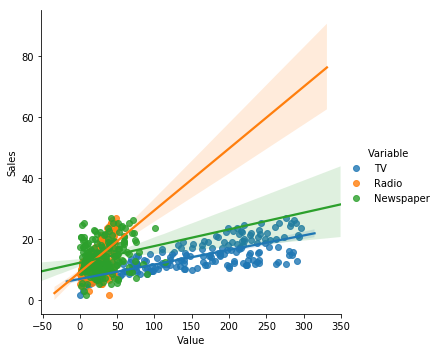

In [0]:

df
#f, ax = plt.subplots(figsize=(10,10))
ax  = sns.lmplot('Value','Sales',hue='Variable',data=df)


In [0]:
actual.describe()

count   200.000
mean     14.023
std       5.217
min       1.600
25%      10.375
50%      12.900
75%      17.400
max      27.000
Name: Sales, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7f94fca51668>],
 'caps': [<matplotlib.lines.Line2D at 0x7f94fca512b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f94fe27d6a0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f94fe27da20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f94fca516d8>,
  <matplotlib.lines.Line2D at 0x7f94fca51080>]}

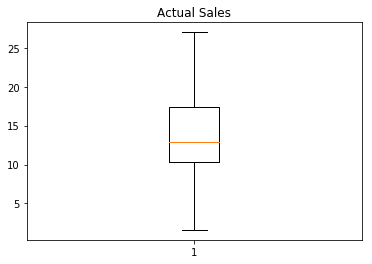

In [0]:
fig1, ax1 = plt.subplots()
ax1.set_title('Actual Sales')
ax1.boxplot(actual)


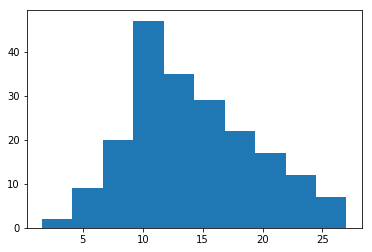

In [0]:
fig, ax = plt.subplots()
plt.hist(actual)
plt.show()

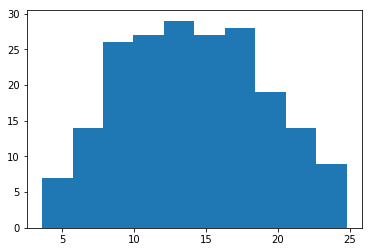

In [0]:
fig, ax = plt.subplots()
plt.hist(predicted)
plt.show()